In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../../data/INSECTS/INSECTS_Abr.csv.gz")

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
model = SVC(
    kernel="rbf",
    probability=True,
)

# Train the model
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict_proba(X_test)[:, 1]

AUROC: 0.885


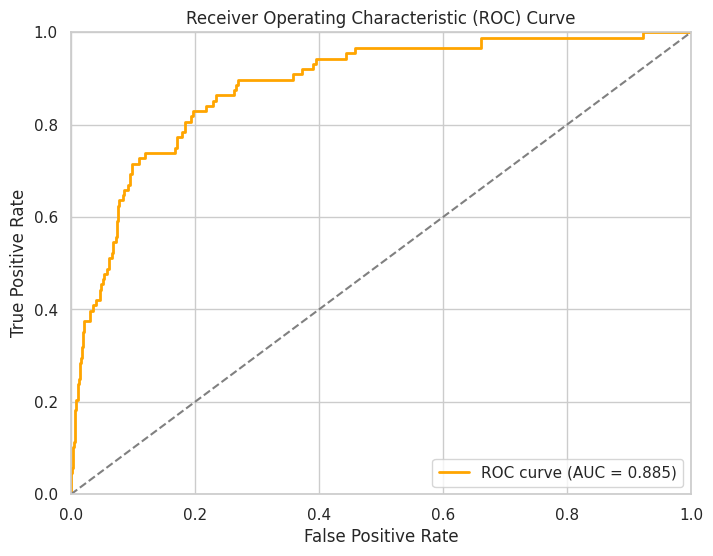

In [4]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
auroc_score = roc_auc_score(y_test, y_pred)
print(f"AUROC: {auroc_score:0.3f}")

# Visualize ROC Curve
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

plt.plot(fpr, tpr, color="orange", lw=2, label=f"ROC curve (AUC = {auroc_score:0.3f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

AUPRC: 0.111


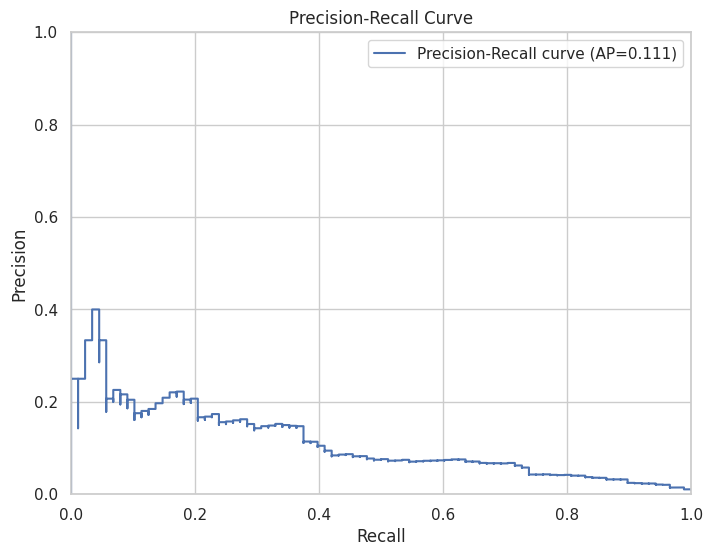

In [5]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
print(f"AUPRC: {average_precision:0.3f}")

# Visualize Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where="post", label=f"Precision-Recall curve (AP={average_precision:0.3f})")

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()